<a href="https://colab.research.google.com/github/HarshbardhanSharma/Handwritting-/blob/main/Handwritting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch import optim
from torch.autograd import Variable


In [ ]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True,
)
test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)

In [ ]:
print(train_data)
print(test_data)

print(train_data.data.size())
print(train_data.targets.size())

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])
torch.Size([60000])


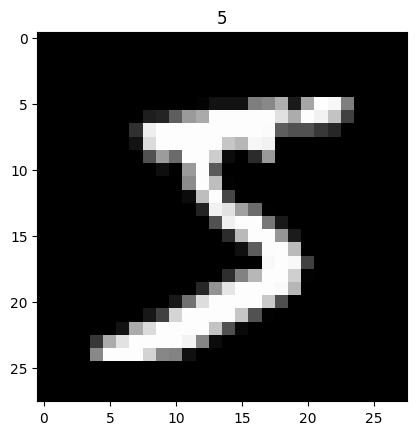

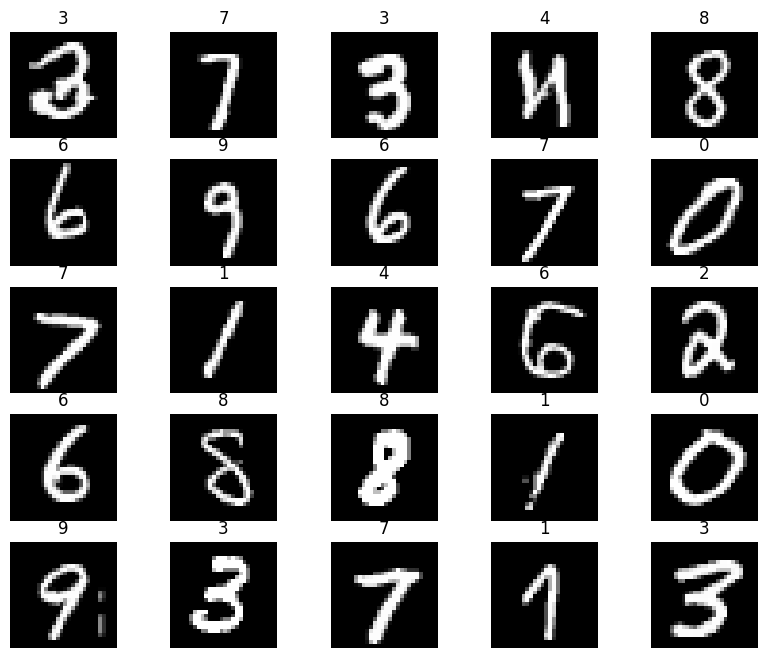

In [ ]:

plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()



In [ ]:

loaders = {
    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),

    'test': DataLoader(test_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1),
}


In [ ]:

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x  # return x for visualization


cnn = CNN()

In [ ]:
print(cnn)

loss_func = nn.CrossEntropyLoss()
print(loss_func)
optimizer = optim.Adam(cnn.parameters(), lr=0.01)
print(optimizer)
num_epochs = 10


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


In [ ]:

def train(num_epochs, cnn, loaders):
    cnn.train()

    # Train the model
    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)  # batch x
            b_y = Variable(labels)  # batch y

            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i + 1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass

        pass

    pass


train(num_epochs, cnn, loaders)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/10], Step [100/600], Loss: 0.1056
Epoch [1/10], Step [200/600], Loss: 0.0514
Epoch [1/10], Step [300/600], Loss: 0.0411
Epoch [1/10], Step [400/600], Loss: 0.1310
Epoch [1/10], Step [500/600], Loss: 0.0754
Epoch [1/10], Step [600/600], Loss: 0.0299
Epoch [2/10], Step [100/600], Loss: 0.0599
Epoch [2/10], Step [200/600], Loss: 0.0186
Epoch [2/10], Step [300/600], Loss: 0.0341
Epoch [2/10], Step [400/600], Loss: 0.0699
Epoch [2/10], Step [500/600], Loss: 0.1535
Epoch [2/10], Step [600/600], Loss: 0.0849
Epoch [3/10], Step [100/600], Loss: 0.0731
Epoch [3/10], Step [200/600], Loss: 0.1331
Epoch [3/10], Step [300/600], Loss: 0.0570
Epoch [3/10], Step [400/600], Loss: 0.3639
Epoch [3/10], Step [500/600], Loss: 0.0041
Epoch [3/10], Step [600/600], Loss: 0.1192
Epoch [4/10], Step [100/600], Loss: 0.0190
Epoch [4/10], Step [200/600], Loss: 0.0167
Epoch [4/10], Step [300/600], Loss: 0.0408
Epoch [4/10], Step [400/600], Loss: 0.0140
Epoch [4/10], Step [500/600], Loss: 0.0601
Epoch [4/10

In [ ]:

def evalFunc():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass

        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

    pass


evalFunc()

Test Accuracy of the model on the 10000 test images: 0.97


In [ ]:

sample = next(iter(loaders['test']))
imgs, lbls = sample

actual_number = lbls[:10].numpy()

test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()


In [ ]:
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [4 7 1 8 7 2 6 4 6 7]
Actual number: [4 7 1 8 7 2 6 4 6 7]
